In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import tools 
from model_dc import model_dc

# Exercise 3 [L10] (Optional) Solving Discrete-Continuous Choice Models
Consider the model from lecture 10. The *value function* is given as
$$\begin{eqnarray*}
v_{t}(m_{t},z_t,\varepsilon_t^0,\varepsilon_t^1) & = & \max_{z_{t+1}\in \mathcal{Z}(z_t)}\left\{\mathcal{V}_t(m_t,z_{t+1})+\sigma_{\varepsilon}\varepsilon_t^{L_{t+1}}\right\} \\
\mathcal{Z}(z_t) &= &\begin{cases}
\{0,1\} & \text{if} & z_t=0 \\
\{1\} & \text{if} & z_t = 1
\end{cases}
\end{eqnarray*}$$
and the *choice-specific value functions* are given by
$$\begin{eqnarray*}
 \mathcal{V}_t(m_t,z_{t+1}) & = & \max_{c_t} \frac{C_{t}^{1-\rho}}{1-\rho}-\alpha \mathbb{1}_{z_{t+1}=0} +\beta\mathbb{E}_{t}\left[v_{t+1}(\bullet_{t+1})\right] \\
  & \text{s.t.}\\
m_{t+1} & = & R(m_{t}-c_{t})+W \xi_{t+1} \mathbb{1}_{z_{t+1}=0}\\
c_t & \leq & m_t\\
\log(\xi_{t+1}) & \sim & \mathcal{N}(-0.5 \sigma_{\xi}^{2} ,\sigma_{\xi}^{2})\\
\varepsilon_{t+1}^0,\varepsilon_{t+1}^1 & \sim & \text{Extreme Value Type 1}
\end{eqnarray*}$$
The Exercise will be to add code in *model_dc* such that Exercise_3 can be run to produce the consumption function figures from the lecture. This cannot be done without understanding all the other functions in *model_dc*

#### 1. Ensure that you understand the function *model.logsum*

#### 2. Ensure that you understand all functions in *model_dc*

#### 3. Fill in the missing stuff in the function *model_dc.EGM*

#### 4. Run *Exercise_3* to check that your results are correct

In [2]:
model = model_dc()
model.setup()
model.create_grids()
model.solve()

par = model.par
sol = model.sol

C:\Users\SDS\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Solve model and plot the results

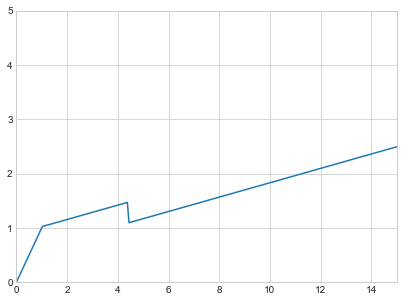

In [3]:
model = model_dc()
model.setup()
model.create_grids()
model.solve()

par = model.par
sol = model.sol

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)

t = 1
state = 0
ax.plot(sol.m[t,state,:],sol.c[t,state,:])
ax.set_xlim(0,15)
ax.set_ylim(0,5)

plt.show()

In [4]:
# Define figures

# Retired
def figure(par,sol,z):
    if z == 1:
        print(f'House bought in t+1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4, par.T-5, par.T-6, par.T-7, par.T-8, par.T-9]
    elif z ==0:
        print(f'No house bought in t+1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4, par.T-5, par.T-6, par.T-7, par.T-8, par.T-9]
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,2,1)
    for i in ts:
        ax.plot(sol.m[i-1,z,:],sol.c[i-1,z,:], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z})$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()


    ax_right = fig.add_subplot(1,2,2)
    for i in ts:
        ax_right.plot(sol.m[i-1,z,:],sol.v[i-1,z,:], label=f't = {i}')
    ax_right.set_xlabel(f"$m_t$")
    ax_right.set_ylabel(f"$v(m_t,z_{{t+1}} = {z})$")
    ax_right.set_xlim([0, 5])
    ax_right.set_ylim([-20,10])
    ax_right.set_title(f'Value function')
    plt.legend()

    plt.show()


C:\Users\SDS\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


sigma_eta = 0.0
No house bought in t+1


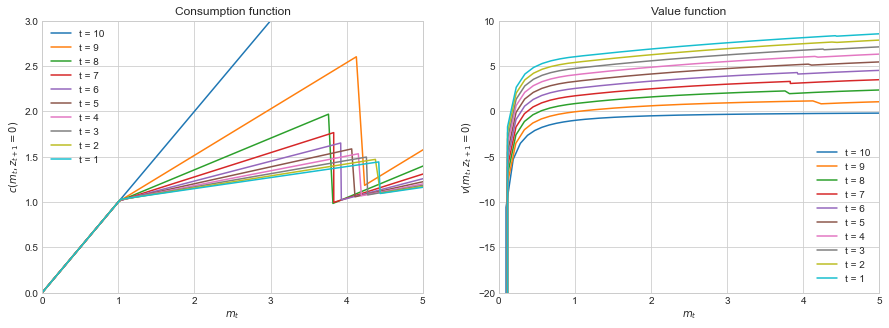

sigma_eta = 0.0
House bought in t+1


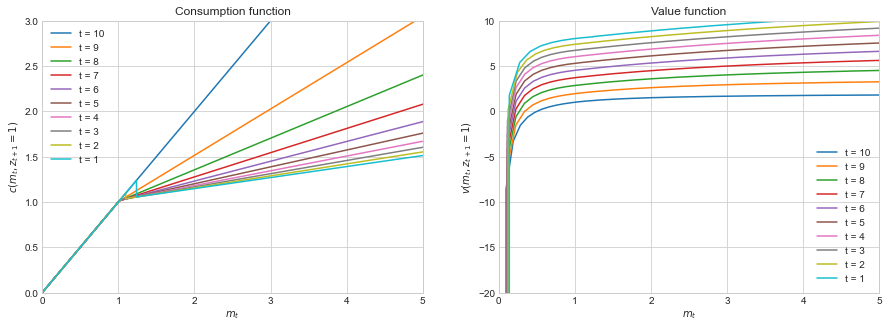

In [5]:
# Print figures for different sigma
sigma_eta_vec = [0.0]

for i,val in enumerate(sigma_eta_vec):
    model.setup()
    model.par.sigma_eta = val
    model.create_grids()
    model.solve()
    print(f'sigma_eta = {par.sigma_eta}')
    figure(model.par,model.sol,0)
    print(f'sigma_eta = {par.sigma_eta}')
    figure(model.par,model.sol,1)
    

Now consider the model extended with permanet income: 
$$\begin{eqnarray*}
v_{t}(m_{t},p_t,z_t,\varepsilon_t^0,\varepsilon_t^1) & = & \max_{z_{t+1}\in \mathcal{Z}(z_t)}\left\{\mathcal{V}_t(m_t,z_{t+1})+\sigma_{\varepsilon}\varepsilon_t^{L_{t+1}}\right\} \\
\mathcal{Z}(z_t) &= &\begin{cases}
\{0,1\} & \text{if} & z_t=0 \\
\{1\} & \text{if} & z_t = 1
\end{cases}
\end{eqnarray*}$$
and the *choice-specific value functions* are given by
$$\begin{eqnarray*}
 \mathcal{V}_t(m_t,p_t,z_{t+1}) & = & \max_{c_t} \frac{C_{t}^{1-\rho}}{1-\rho}-\alpha \mathbb{1}_{z_{t+1}=0} +\beta\mathbb{E}_{t}\left[v_{t+1}(\bullet_{t+1})\right] \\
  & \text{s.t.}\\
p_{t+1} & = &  \begin{cases}
p_t & \text{if} & z_{t+1}=1 \\
\xi_{t+1}p_t & \text{if} & z_{t+1} = 0
\end{cases}  \\
m_{t+1} & = & R(m_{t}-c_{t})+W \mathbb{1}_{z_{t+1}=0} p_{t+1}+ \kappa \mathbb{1}_{z_{t+1}=1} p_{t+1}\\
c_t & \leq & m_t\\
\log(\xi_{t+1}) & \sim & \mathcal{N}(-0.5 \sigma_{\xi}^{2} ,\sigma_{\xi}^{2})\\
\varepsilon_{t+1}^0,\varepsilon_{t+1}^1 & \sim & \text{Extreme Value Type 1}
\end{eqnarray*}$$

#### 5. Solve the extended model [THIS IS NOT EASY]
Hint: You have an extra state variable, and you therefore have to make an outer loop for both z and p.

In [6]:
from model_dc_multidim import model_dc_multidim
import time

ModuleNotFoundError: No module named 'model_dc_multidim'

In [ ]:
t0 = time.time()  # set the starting time
model = model_dc_multidim()
model.setup()
model.create_grids()
model.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

In [ ]:
# Figure
def figure_multi_dim(par,sol,z,i_p):
    p = par.grid_p[i_p]
    if z == 0:
        print(f'Retire in t+1')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
        print(f'p={p:.3}')
    elif z ==1:
        print(f'Working in t+1')
        print(f'p={p:.3}')
        ts = [par.T, par.T-1, par.T-2, par.T-3, par.T-4]
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    for i in ts:
        ax.scatter(par.grid_m,sol.c[i-1,z,:,i_p], label=f't = {i}')
    ax.set_xlabel(f"$m_t$")
    ax.set_ylabel(f"$c(m_t,z_{{t+1}} = {z}, p = {p:.3})$")
    ax.set_xlim([0, 5])
    ax.set_ylim([0,3])
    ax.set_title(f'Consumption function')
    plt.legend()
    plt.show()

figure_multi_dim(model.par,model.sol,1,25)
figure_multi_dim(model.par,model.sol,1,50)
figure_multi_dim(model.par,model.sol,1,75)